# Ensemble Learning – Assignment Solutions




## Theoretical Questions and Answers

### 1. What is ensemble learning in machine learning?

Ensemble learning is a technique where we combine predictions from **multiple base models** (often called base learners) to build a **stronger overall model**. Instead of relying on a single classifier/regressor, we train several models and aggregate their outputs (e.g., by majority vote or averaging).

The intuition is that multiple diverse models can **reduce variance and/or bias**, leading to better generalization performance compared to any individual model.

### 2. What are the main types of ensemble techniques?

Common types of ensemble techniques are:

- **Bagging (Bootstrap Aggregating)**  
  Train many models in parallel on different bootstrap samples of the training data and aggregate their predictions (e.g., Random Forest).

- **Boosting**  
  Train models **sequentially**, where each new model focuses on the errors of the previous ones (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM).

- **Stacking (Stacked Generalization)**  
  Train different base models and then train a **meta-model** on their predictions.

- **Voting / Averaging**  
  Combine multiple different models by simple majority voting (classification) or averaging (regression).

### 3. Explain the key idea behind ensemble techniques.

The key idea is: **many weak opinions can make a strong decision**. Each base learner may have limited accuracy or may overfit in different ways, but if they are reasonably accurate and **diverse** (i.e., they make different errors), then combining them can:

- Reduce **variance** (bagging),
- Reduce **bias** (boosting),
- Improve **robustness** and **stability**,
- Provide better generalization to unseen data.

### 4. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble of many **decision trees** trained using **bagging** plus **feature randomness**:

- Each tree is trained on a bootstrap sample of the training data.
- At each split, the tree considers only a random subset of features.
- For classification, predictions from all trees are combined by **majority voting**.

This randomness decorrelates the trees and usually gives better performance and robustness than a single decision tree.

### 5. Why is Random Forest better than a single Decision Tree?

A single decision tree:
- Has **high variance** (it can change a lot with small changes in data).
- Tends to **overfit** if not pruned properly.

Random Forest:
- Averages predictions from many trees, which **reduces variance**.
- Uses feature randomness and bootstrap sampling to create **diverse** trees.
- Is usually **more accurate, robust, and stable**, and less sensitive to noise/outliers than a single tree.

### 6. What is the main advantage of ensemble techniques?

The main advantage is **improved predictive performance**:

- Lower generalization error (better accuracy / lower MSE).  
- Reduced variance and sometimes reduced bias.  
- Improved robustness to noise and outliers.  

In practice, ensemble methods often rank among the **top-performing models** in machine learning competitions and real-world applications.

### 7. What is the main challenge of ensemble methods?

Key challenges include:

- **Increased computational cost**: Training many models can be slower and more memory intensive.
- **Complexity & interpretability**: Ensembles are harder to interpret than a single simple model.
- **Tuning**: More hyperparameters (number of estimators, depth, learning rate, etc.) can make tuning more complex.
- **Deployment**: Larger model size and latency can be an issue in resource-constrained environments.

### 8. What are some real-world applications of ensemble techniques?

Ensemble methods are widely used in:

- **Finance**: credit scoring, fraud detection, algorithmic trading.
- **Healthcare**: disease prediction, medical image analysis.
- **Marketing**: customer churn prediction, recommendation systems.
- **Computer vision**: object detection, image classification.
- **NLP**: sentiment analysis, spam detection.
- **Kaggle/Competition settings**: ensembling is almost standard to boost leaderboard scores.

### 9. What is the difference between Bagging and Boosting?

**Bagging (Bootstrap Aggregating):**
- Base learners are trained **in parallel** on different bootstrap samples.  
- Aim: mainly **reduce variance**.  
- All learners have equal weight in final prediction.  
- Example: Random Forest.

**Boosting:**
- Base learners are trained **sequentially**. Each new learner focuses on **correcting errors** of the previous ones.  
- Aim: reduce **bias and variance** by building a strong learner from many weak learners.  
- Learners have **different weights** depending on their performance.  
- Examples: AdaBoost, Gradient Boosting, XGBoost.

### 10. How does Bagging help in reducing overfitting?

Bagging trains many models on **different bootstrap samples** of the training data and then averages their predictions (or uses majority vote). While an individual high-variance model (like a deep decision tree) may overfit, the **average of many overfitted models is less overfitted** because their errors tend to cancel out.

Thus, bagging **reduces variance**, which effectively reduces overfitting and improves generalization.

### 11. Can we use Bagging for regression problems?

Yes. Bagging works for both **classification and regression** problems.

- For classification, predictions from base classifiers are combined by **majority voting** or by averaging class probabilities.  
- For regression, predictions from base regressors are combined by **averaging** their outputs.

In scikit-learn, `BaggingRegressor` is used for regression tasks.

### 12. What is the difference between multiple model training and single model training?

- **Single model training**: Train one model on the available data. The performance depends entirely on this model's capacity and inductive bias.

- **Multiple model training (ensembles)**: Train **several models** and combine their predictions. This can:
  - Reduce variance (bagging),  
  - Reduce bias (boosting),  
  - Increase robustness and stability,  
  - But at the cost of higher computation and lower interpretability.

### 13. Explain the concept of feature randomness in Random Forest.

In a Random Forest, at each split of a decision tree, we do **not** consider all features. Instead, we randomly select a **subset of features** and choose the best split only from that subset.

Effects:
- Increases **diversity** between trees (they see different feature subsets).
- Reduces **correlation** between trees, so averaging them is more effective.
- Often improves performance and robustness compared to bagging pure decision trees without feature randomness.

### 14. What is OOB (Out-of-Bag) Score?

In bagging-based models like Random Forest:

- Each tree is trained on a **bootstrap sample** of the training data.
- On average, about **1/3 of the samples are not included** in that bootstrap sample; these are called **Out-of-Bag (OOB) samples**.

The **OOB score** is an internal validation score computed by:
- For each training sample, aggregating predictions from only the trees that **did not** see that sample during training.  
- Comparing these aggregated predictions with true labels.

It provides an **unbiased estimate** of the model’s generalization performance without needing a separate validation set.

### 15. How can you measure the importance of features in a Random Forest model?

Common approaches:

1. **Impurity-based feature importance** (Gini importance):  
   - During training, each split reduces an impurity measure (e.g., Gini or MSE).  
   - For each feature, sum the impurity decrease it produces over all trees and normalize.

2. **Permutation importance**:  
   - After training, randomly shuffle the values of one feature across the dataset.  
   - Measure how much model performance drops. Larger drops indicate more important features.

Most libraries (like scikit-learn) expose `feature_importances_` for impurity-based importance and implement permutation importance utilities.

### 16. Explain the working principle of a Bagging Classifier.

Working steps:

1. Given a training set, create **B bootstrap samples** (random samples with replacement of the same size as the original dataset).
2. Train a **base classifier** (e.g., decision tree, SVM, logistic regression) on each bootstrap sample.
3. For a new instance, get predictions from all base classifiers.
4. Combine predictions using **majority voting** (for classification) to get the final output.

Because each base model sees a different subset of data, their errors are less correlated, and the aggregated prediction is more stable and accurate.

### 17. How do you evaluate a Bagging Classifier’s performance?

To evaluate a Bagging Classifier, we can use the **same metrics** as for any other classifier:

- **Accuracy**  
- **Precision, Recall, F1-score**  
- **Confusion matrix**  
- **ROC-AUC, PR-AUC** (for probabilistic outputs)  

We can evaluate performance using:
- A **train/test split**
- **Cross-validation**
- **OOB score** (if available) as an internal estimate.

### 18. How does a Bagging Regressor work?

Bagging Regressor works similarly to Bagging Classifier but for regression:

1. Generate multiple bootstrap samples from the training data.
2. Train a **base regressor** (e.g., decision tree regressor, KNN regressor) on each sample.
3. For a new input, obtain predictions from all regressors.
4. Take the **average** of all predictions as the final prediction.

Averaging reduces variance and helps the model generalize better.

### 19. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling means sampling **with replacement** from the original dataset to create multiple training sets (each of the same size as the original). In Bagging:

- Each base model is trained on a **different bootstrap sample**.
- This introduces variability and **decorrelates** the models.
- Aggregating these diverse models reduces variance and improves generalization.

Without bootstrap sampling, many models might become too similar, reducing the benefit of ensembling.

### 20. When should we avoid using ensemble methods?

We might avoid ensembles when:

- **Interpretability is crucial**: e.g., regulatory domains where you must explain each decision clearly; a single decision tree or linear model might be preferred.
- **Limited computational resources**: ensembles can be slow to train and serve.
- **Very small datasets**: a complex ensemble might overfit; a simpler model with good regularization may be better.
- **Low-latency requirements**: real-time systems with strict timing constraints may require smaller models.

In such cases, a simpler, well-regularized model can be more appropriate.

## Practical Tasks – Python Implementations


In [1]:
# Common imports used in most tasks
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing, make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, mean_squared_error, confusion_matrix,
                             classification_report, roc_auc_score, roc_curve,
                             precision_recall_curve, precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

RANDOM_STATE = 42


### 1) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [3]:
# Using the Iris dataset as a sample classification dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

base_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_clf = BaggingClassifier(estimator=base_clf,
                                n_estimators=50,
                                random_state=RANDOM_STATE)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Bagging DecisionTree accuracy: {acc:.4f}")

Bagging DecisionTree accuracy: 0.9333


### 2) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [5]:
# Using a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=10.0, random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

base_reg = DecisionTreeRegressor(random_state=RANDOM_STATE)
bagging_reg = BaggingRegressor(estimator=base_reg,
                               n_estimators=50,
                               random_state=RANDOM_STATE)

bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging DecisionTree Regressor MSE: {mse:.4f}")

Bagging DecisionTree Regressor MSE: 2885.7360


### 3) Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [6]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("Top 10 features by importance:\n")
for idx in sorted_idx[:10]:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Top 10 features by importance:

worst concave points: 0.1590
worst area: 0.1470
worst perimeter: 0.0858
worst radius: 0.0790
mean radius: 0.0777
mean perimeter: 0.0742
mean concave points: 0.0659
mean concavity: 0.0543
mean area: 0.0417
worst concavity: 0.0314


### 4) Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [7]:
# Using California housing dataset for regression (or fallback to synthetic)
try:
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
except Exception as e:
    print("Could not fetch California housing, using synthetic data.")
    X, y = make_regression(n_samples=2000, n_features=8, noise=15.0, random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

dt_reg = DecisionTreeRegressor(random_state=RANDOM_STATE)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

dt_pred = dt_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"DecisionTreeRegressor MSE: {dt_mse:.4f}")
print(f"RandomForestRegressor MSE: {rf_mse:.4f}")

DecisionTreeRegressor MSE: 0.5280
RandomForestRegressor MSE: 0.2565


### 5) Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [8]:
data = load_breast_cancer()
X, y = data.data, data.target

rf_clf_oob = RandomForestClassifier(n_estimators=200,
                                   oob_score=True,
                                   bootstrap=True,
                                   random_state=RANDOM_STATE)
rf_clf_oob.fit(X, y)

print(f"OOB Score: {rf_clf_oob.oob_score_:.4f}")

OOB Score: 0.9596


### 6) Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

base_svm = SVC(probability=False, kernel='rbf', gamma='scale', random_state=RANDOM_STATE)
bagging_svm = BaggingClassifier(estimator=base_svm,
                                n_estimators=20,
                                random_state=RANDOM_STATE)

bagging_svm.fit(X_train, y_train)
y_pred = bagging_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Bagging SVM accuracy: {acc:.4f}")

Bagging SVM accuracy: 0.9556


### 7) Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [11]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={n}: accuracy={acc:.4f}")

n_estimators=10: accuracy=0.9298
n_estimators=50: accuracy=0.9240
n_estimators=100: accuracy=0.9357
n_estimators=200: accuracy=0.9415


### 8) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [13]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

base_log = LogisticRegression(max_iter=500, solver='lbfgs')
bagging_log = BaggingClassifier(estimator=base_log,
                                n_estimators=20,
                                random_state=RANDOM_STATE)

bagging_log.fit(X_train, y_train)
y_proba = bagging_log.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"Bagging LogisticRegression ROC-AUC: {auc:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging LogisticRegression ROC-AUC: 0.9911


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 9) Train a Random Forest Regressor and analyze feature importance scores

In [14]:
try:
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    feature_names = housing.feature_names
except Exception as e:
    print("Could not fetch California housing, using synthetic data.")
    X, y = make_regression(n_samples=2000, n_features=8, noise=15.0, random_state=RANDOM_STATE)
    feature_names = [f"x{i}" for i in range(X.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_reg.fit(X_train, y_train)

importances = rf_reg.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("Feature importances:\n")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Feature importances:

MedInc: 0.5260
AveOccup: 0.1382
Longitude: 0.0861
Latitude: 0.0861
HouseAge: 0.0547
AveRooms: 0.0472
Population: 0.0317
AveBedrms: 0.0300


### 10) Train an ensemble model using both Bagging and Random Forest and compare accuracy

In [16]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

# Bagging with decision trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                                n_estimators=50,
                                random_state=RANDOM_STATE)
bagging_clf.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"BaggingClassifier accuracy: {bagging_acc:.4f}")
print(f"RandomForestClassifier accuracy: {rf_acc:.4f}")

BaggingClassifier accuracy: 0.9415
RandomForestClassifier accuracy: 0.9357


## Additional Practical Tasks

### 11) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [17]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_rf = grid.best_estimator_
test_acc = accuracy_score(y_test, best_rf.predict(X_test))
print("Test accuracy:", test_acc)

Best params: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
Best CV accuracy: 0.9673995595048227
Test accuracy: 0.9473684210526315


### 12) Train a Bagging Regressor with different numbers of base estimators and compare performance

In [19]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10.0, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

for n in [10, 30, 50, 100]:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
                               n_estimators=n,
                               random_state=RANDOM_STATE)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"n_estimators={n}: MSE={mse:.4f}")

n_estimators=10: MSE=3370.7124
n_estimators=30: MSE=3053.2795
n_estimators=50: MSE=2885.7360
n_estimators=100: MSE=2865.7296


### 13) Train a Random Forest Classifier and analyze misclassified samples

In [20]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mis_idx = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(mis_idx)}\n")
print("Indices and (true, pred) labels:")
for i in mis_idx:
    print(f"Index {i}: true={y_test[i]}, pred={y_pred[i]}")

Number of misclassified samples: 5

Indices and (true, pred) labels:
Index 2: true=2, pred=1
Index 24: true=2, pred=1
Index 30: true=2, pred=1
Index 39: true=1, pred=2
Index 42: true=2, pred=1


### 14) Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [22]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                               n_estimators=50,
                               random_state=RANDOM_STATE)

dt.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)

dt_acc = accuracy_score(y_test, dt.predict(X_test))
bag_acc = accuracy_score(y_test, bagging_dt.predict(X_test))

print(f"DecisionTree accuracy: {dt_acc:.4f}")
print(f"Bagging DecisionTree accuracy: {bag_acc:.4f}")

DecisionTree accuracy: 0.9181
Bagging DecisionTree accuracy: 0.9415


### 15) Train a Random Forest Classifier and visualize the confusion matrix

Confusion matrix:
 [[ 58   6]
 [  5 102]]


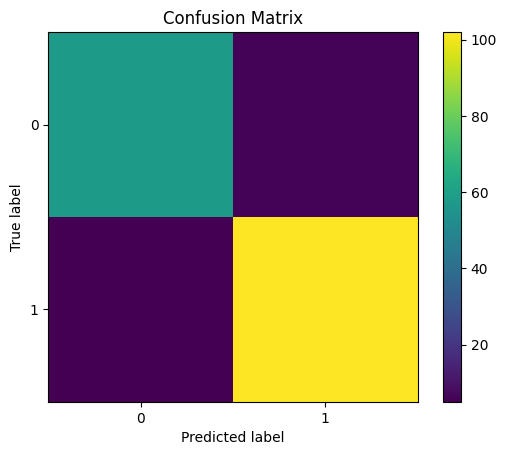

In [23]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### 16) Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [24]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)),
    ('svm', SVC(probability=True, kernel='rbf', gamma='scale', random_state=RANDOM_STATE))
]

final_estimator = LogisticRegression(max_iter=500)

stack_clf = StackingClassifier(estimators=estimators,
                               final_estimator=final_estimator,
                               passthrough=False)

stack_clf.fit(X_train, y_train)
stack_acc = accuracy_score(y_test, stack_clf.predict(X_test))
print(f"Stacking classifier accuracy: {stack_acc:.4f}")

Stacking classifier accuracy: 0.9298


### 17) Train a Random Forest Classifier and print the top 5 most important features

In [25]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("Top 5 features:\n")
for idx in sorted_idx[:5]:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Top 5 features:

worst concave points: 0.1590
worst area: 0.1470
worst perimeter: 0.0858
worst radius: 0.0790
mean radius: 0.0777


### 18) Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [27]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                            n_estimators=50,
                            random_state=RANDOM_STATE)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.9450
Recall: 0.9626
F1-score: 0.9537


### 19) Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [28]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

depths = [None, 3, 5, 8, 12]
accuracies = []

for d in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    accuracies.append(acc)
    print(f"max_depth={d}: accuracy={acc:.4f}")

max_depth=None: accuracy=0.9357
max_depth=3: accuracy=0.9357
max_depth=5: accuracy=0.9415
max_depth=8: accuracy=0.9357
max_depth=12: accuracy=0.9357


### 20) Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [30]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10.0, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

dt_bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
                          n_estimators=50,
                          random_state=RANDOM_STATE)
knn_bag = BaggingRegressor(estimator=KNeighborsRegressor(),
                           n_estimators=50,
                           random_state=RANDOM_STATE)

dt_bag.fit(X_train, y_train)
knn_bag.fit(X_train, y_train)

dt_mse = mean_squared_error(y_test, dt_bag.predict(X_test))
knn_mse = mean_squared_error(y_test, knn_bag.predict(X_test))

print(f"Bagging DecisionTreeRegressor MSE: {dt_mse:.4f}")
print(f"Bagging KNeighborsRegressor MSE: {knn_mse:.4f}")

Bagging DecisionTreeRegressor MSE: 2885.7360
Bagging KNeighborsRegressor MSE: 4147.9917


### 21) Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [31]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.4f}")

ROC-AUC: 0.9913


### 22) Train a Bagging Classifier and evaluate its performance using cross-validation

In [33]:
data = load_breast_cancer()
X, y = data.data, data.target

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                            n_estimators=50,
                            random_state=RANDOM_STATE)

scores = cross_val_score(bag_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean accuracy: 0.9543859649122808


### 23) Train a Random Forest Classifier and plot the Precision-Recall curve

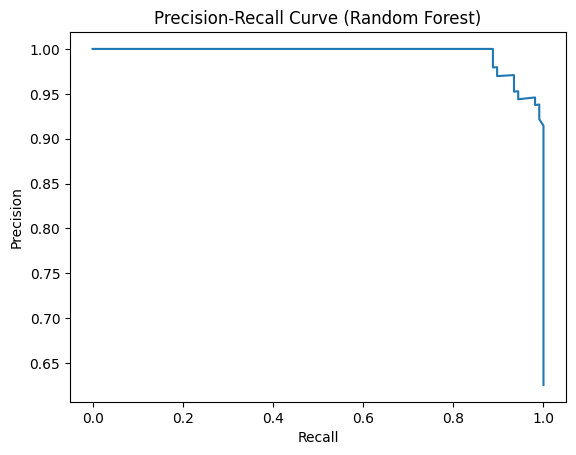

In [34]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.show()

### 24) Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [35]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)),
]

final_estimator = LogisticRegression(max_iter=500)

stack_clf = StackingClassifier(estimators=estimators,
                               final_estimator=final_estimator,
                               passthrough=False)

stack_clf.fit(X_train, y_train)
stack_acc = accuracy_score(y_test, stack_clf.predict(X_test))
print(f"Stacking (RF + LR) accuracy: {stack_acc:.4f}")

Stacking (RF + LR) accuracy: 0.9357


### 25) Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [37]:
# bootstrap=True always samples the same size as original dataset, but max_samples can change effective sample size
X, y = make_regression(n_samples=1000, n_features=10, noise=10.0, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

for frac in [0.5, 0.7, 1.0]:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
                               n_estimators=50,
                               max_samples=frac,
                               bootstrap=True,
                               random_state=RANDOM_STATE)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"max_samples={frac}: MSE={mse:.4f}")

max_samples=0.5: MSE=3203.4483
max_samples=0.7: MSE=3163.6627
max_samples=1.0: MSE=2885.7360
